In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats

# Style
sns.set(style="whitegrid")

In [7]:
# Step 1: Download and unzip

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip -o bank-additional.zip

# Step 2: Load the FULL dataset

df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

--2025-06-15 07:50:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank-additional.zip.1’

bank-additional.zip     [  <=>               ] 434.15K  1.73MB/s    in 0.2s    

2025-06-15 07:50:37 (1.73 MB/s) - ‘bank-additional.zip.1’ saved [444572]

Archive:  bank-additional.zip
  inflating: bank-additional/.DS_Store  
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  


## Timing Effectiveness Analysis

In [19]:
# Add cost column
call_cost = 10  # ₹10 per call
df['call_cost'] = df['campaign'] * call_cost

In [20]:
# Monthly cost and conversion analysis
monthly_costs = (
    df.groupby('month')
    .agg(
        total_customers=('y', 'count'),
        conversions=('y', lambda x: (x == 'yes').sum()),
        total_calls=('campaign', 'sum')
    )
    .reset_index()
)

monthly_costs['total_cost'] = monthly_costs['total_calls'] * call_cost
monthly_costs['conversion_rate'] = (monthly_costs['conversions'] / monthly_costs['total_customers']) * 100
monthly_costs['cost_per_conversion'] = monthly_costs.apply(
    lambda row: row['total_cost'] / row['conversions'] if row['conversions'] > 0 else np.nan,
    axis=1
)

In [21]:
monthly_costs.round(2)

,month,total_customers,conversions,total_calls,total_cost,conversion_rate,cost_per_conversion
0,apr,2632,539,5125,51250,20.48,95.08
1,aug,6178,655,16474,164740,10.60,251.51
2,dec,182,89,393,3930,48.90,44.16
3,jul,7174,649,22677,226770,9.05,349.41
4,jun,5318,559,16338,163380,10.51,292.27
5,mar,546,276,1203,12030,50.55,43.59
6,may,13769,886,33593,335930,6.43,379.15
7,nov,4101,416,7830,78300,10.14,188.22
8,oct,718,315,1110,11100,43.87,35.24
9,sep,570,256,1011,10110,44.91,39.49


In [24]:
# statistical Test

contingency = pd.crosstab(df['month'], df['y'])
chi2, p, dof, _ = chi2_contingency(contingency)

print(f"Chi² = {chi2:.2f}, p = {p:.4f}")
print("✅ Significant difference" if p < 0.05 else "❌ Not statistically significant")

Chi² = 3101.15, p = 0.0000
✅ Significant difference


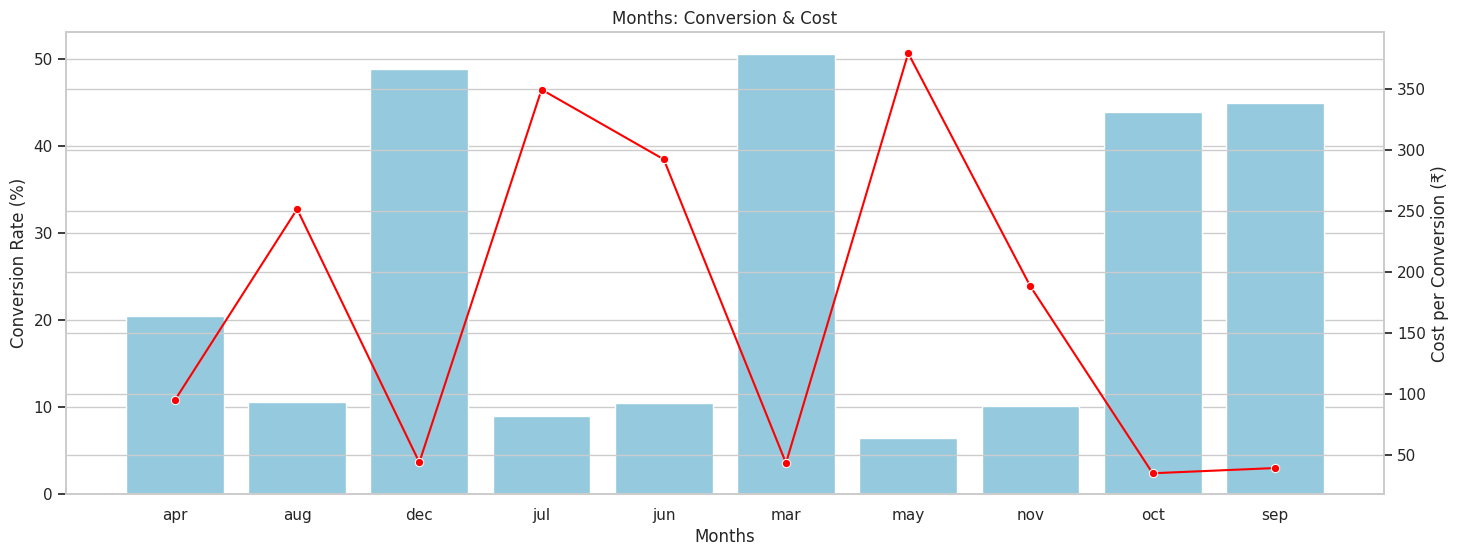

In [23]:
# visualization

fig, ax1 = plt.subplots(figsize=(17, 6))
sns.barplot(data=monthly_costs, x='month', y='conversion_rate', ax=ax1, color='skyblue')
ax1.set_ylabel('Conversion Rate (%)')
ax1.set_xlabel('Months')

ax2 = ax1.twinx()
sns.lineplot(data=monthly_costs, x='month', y='cost_per_conversion', ax=ax2, marker='o', color='red')
ax2.set_ylabel('Cost per Conversion (₹)')
plt.title("Months: Conversion & Cost")
plt.show()

## day of the week

In [25]:
# Step 2: Group by day of the week and compute insights
daywise = (
    df.groupby('day_of_week')
    .agg(
        total_customers=('y', 'count'),
        conversions=('y', lambda x: (x == 'yes').sum()),
        total_calls=('campaign', 'sum')
    )
    .reset_index()
)

# Step 3: Compute metrics
daywise['total_cost'] = daywise['total_calls'] * call_cost
daywise['conversion_rate'] = (daywise['conversions'] / daywise['total_customers']) * 100
daywise['cost_per_conversion'] = daywise.apply(
    lambda row: row['total_cost'] / row['conversions'] if row['conversions'] > 0 else np.nan,
    axis=1
)

In [26]:
# Step 4: Round for presentation
daywise = daywise.round(2)

In [27]:
daywise

,day_of_week,total_customers,conversions,total_calls,total_cost,conversion_rate,cost_per_conversion
0,fri,7827,846,21289,212890,10.81,251.64
1,mon,8514,847,22526,225260,9.95,265.95
2,thu,8623,1045,22379,223790,12.12,214.15
3,tue,8090,953,19633,196330,11.78,206.01
4,wed,8134,949,19927,199270,11.67,209.98


In [28]:
# statistical Test

contingency = pd.crosstab(df['day_of_week'], df['y'])
chi2, p, dof, _ = chi2_contingency(contingency)

print(f"Chi² = {chi2:.2f}, p = {p:.4f}")
print("✅ Significant difference" if p < 0.05 else "❌ Not statistically significant")

Chi² = 26.14, p = 0.0000
✅ Significant difference


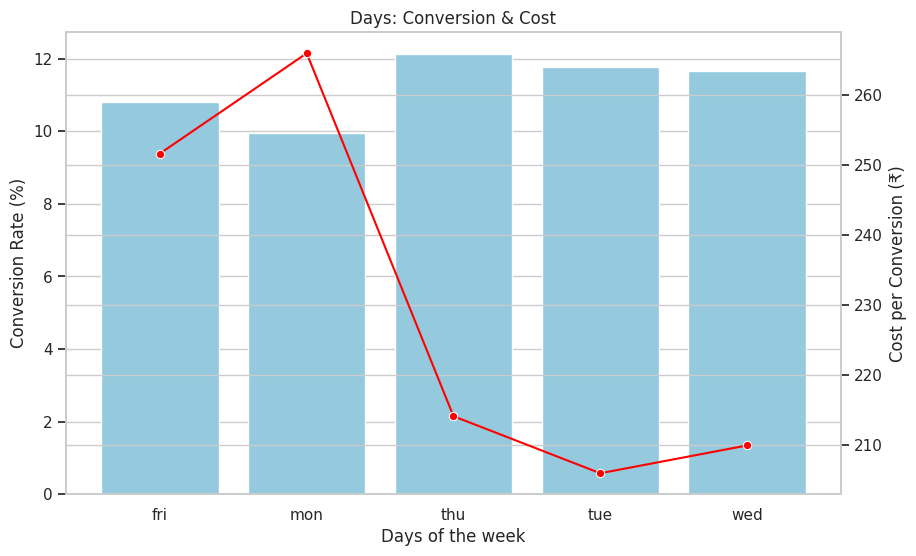

In [30]:
# visualization

fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(data=daywise, x='day_of_week', y='conversion_rate', ax=ax1, color='skyblue')
ax1.set_ylabel('Conversion Rate (%)')
ax1.set_xlabel('Days of the week')

ax2 = ax1.twinx()
sns.lineplot(data=daywise, x='day_of_week', y='cost_per_conversion', ax=ax2, marker='o', color='red')
ax2.set_ylabel('Cost per Conversion (₹)')
plt.title("Days: Conversion & Cost")
plt.show()